In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
geo_df = pd.read_excel('3D_Battery_Parameter_Log.xls', sheet_name='GeometryParameters')
geo_df.drop(columns=['DOI', 'Cathode 3D \nCharateristic Note', 'Anode 3D \nCharateristic Note'], inplace=True)
cols = list(geo_df.columns)
new_cols = ['Paper', 'Set', 'Full Cell Thickness [µm]', 'Cathode Thickness [µm]', 'Anode Thickness [µm]', 
           'Separator Thickness [µm]', 'Cathode Length [µm]', 'Anode Length [µm]']
rename_cols = dict(zip(cols, new_cols))
geo_df.rename(columns=rename_cols, inplace=True)

In [3]:
geo_df.head()

,Paper,Set,Full Cell Thickness [µm],Cathode Thickness [µm],Anode Thickness [µm],Separator Thickness [µm],Cathode Length [µm],Anode Length [µm]
0,1,1,NaN,500,N/R,N/R,100,NaN
1,2,1,NaN,N/R,215,N/R,N/R,NaN
2,2,2,NaN,N/R,415,N/R,N/R,NaN
3,2,3,NaN,N/R,265,N/R,N/R,NaN
4,2,4,NaN,N/R,473,N/R,N/R,NaN


In [4]:
arch_df = pd.read_excel('3D_Battery_Parameter_Log.xls', sheet_name='GeneralInformation')
arch_df.rename(columns={'Paper #': 'Paper'}, inplace=True)
remove_cols = list(arch_df.columns[-14:])
remove_cols.append('DOI')
arch_df.drop(columns=remove_cols, inplace=True)

In [5]:
arch_df.head()

,Paper,Set,Overall Architecture,Cathode Architecture,Anode Architecture,1C current Density [mA/cm^2]
0,1,1,2.5D,3D Column,1D Planar,1.78
1,2,1,2.5D,1D Planar,3D Lattice,NaN
2,2,2,NaN,1D Planar,3D Lattice,NaN
3,2,3,NaN,1D Planar,3D Lattice,NaN
4,2,4,NaN,1D Planar,3D Lattice,NaN


In [6]:
merged_df = pd.merge(geo_df, arch_df, on=['Paper', 'Set'])#, how='outer')
#merged_df.replace(['N/R'], np.NaN)
for col in merged_df.columns[:8]:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

In [7]:
merged_df.head()

,Paper,Set,Full Cell Thickness [µm],Cathode Thickness [µm],Anode Thickness [µm],Separator Thickness [µm],Cathode Length [µm],Anode Length [µm],Overall Architecture,Cathode Architecture,Anode Architecture,1C current Density [mA/cm^2]
0,1,1,NaN,500.0,NaN,NaN,100.0,NaN,2.5D,3D Column,1D Planar,1.78
1,2,1,NaN,NaN,215.0,NaN,NaN,NaN,2.5D,1D Planar,3D Lattice,NaN
2,2,2,NaN,NaN,415.0,NaN,NaN,NaN,NaN,1D Planar,3D Lattice,NaN
3,2,3,NaN,NaN,265.0,NaN,NaN,NaN,NaN,1D Planar,3D Lattice,NaN
4,2,4,NaN,NaN,473.0,NaN,NaN,NaN,NaN,1D Planar,3D Lattice,NaN


In [8]:
# Features
full_cell_thickness = merged_df['Full Cell Thickness [µm]'].values
cathode_thickness = merged_df['Cathode Thickness [µm]'].values
anode_thickness = merged_df['Anode Thickness [µm]'].values
sep_thickness = merged_df['Separator Thickness [µm]'].values
cathode_length = merged_df['Cathode Length [µm]'].values
anode_length = merged_df['Anode Length [µm]'].values

# Labels
overall_arc = merged_df['Overall Architecture'].values

In [27]:
overall_arc_no_nans = []
for arc in overall_arc:
    if arc is not np.NaN and arc != '?':
        overall_arc_no_nans.append(arc)
unique_arc = np.unique(overall_arc_no_nans)

#df_arc = merged_df['Overall Architecture'].replace(np.nan, 'N/A', regex=True)
#merged_df[df_arc.str.contains('3D Coin Cell')]

avg_full_cell_thicknesses = []
full_cell_thickness_errors = []

avg_cathode_thicknesses = []
cathode_thickness_errors = []

avg_anode_thicknesses = []
anode_thickness_errors = []

avg_sep_thicknesses = []
sep_thickness_errors = []

avg_cathode_lengths = []
cathode_length_errors = []

avg_anode_lengths = []
anode_length_errors = []

for arc in unique_arc:
    avg_full_cell_thickness = merged_df[merged_df['Overall Architecture'] == arc]['Full Cell Thickness [µm]'].mean()
    min_full_cell_thickness = merged_df[merged_df['Overall Architecture'] == arc]['Full Cell Thickness [µm]'].min()
    max_full_cell_thickness = merged_df[merged_df['Overall Architecture'] == arc]['Full Cell Thickness [µm]'].max()
    avg_full_cell_thicknesses.append(avg_full_cell_thickness)
    full_cell_thickness_errors.append([avg_full_cell_thickness - min_full_cell_thickness, 
                                       max_full_cell_thickness - avg_full_cell_thickness])
    
    avg_cathode_thickness = merged_df[merged_df['Overall Architecture'] == arc]['Cathode Thickness [µm]'].mean()
    avg_cathode_thicknesses.append(avg_cathode_thickness)
    
    avg_anode_thickness = merged_df[merged_df['Overall Architecture'] == arc]['Anode Thickness [µm]']
    avg_anode_thicknesses.append(avg_anode_thickness)
    avg_sep_thickness = merged_df[merged_df['Overall Architecture'] == arc]['Separator Thickness [µm]']
    avg_sep_thicknesses.append(avg_sep_thickness)
    avg_cathode_length = merged_df[merged_df['Overall Architecture'] == arc]['Cathode Length [µm]']
    avg_cathode_lengths.append(avg_cathode_length)
    avg_anode_length = merged_df[merged_df['Overall Architecture'] == arc]['Anode Length [µm]']
    avg_anode_lengths.append(avg_anode_length)
    
full_cell_thickness_errors = np.transpose(full_cell_thickness_errors)

In [9]:
matplotlib.rcParams.update({'font.size': 20})

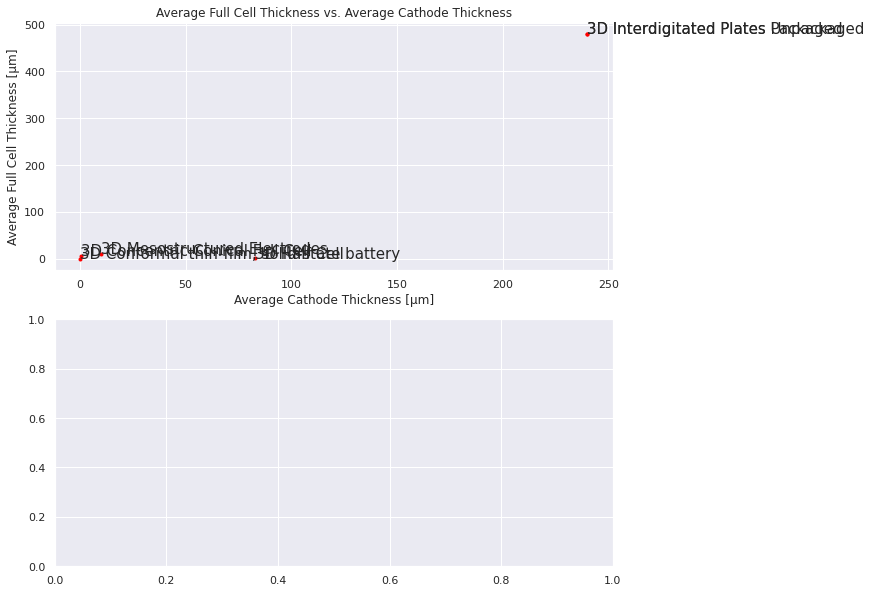

In [28]:
fig = plt.figure(figsize=(10,10))
axes = fig.subplots(nrows=2, ncols=1)

axes[0].errorbar(avg_cathode_thicknesses, avg_full_cell_thicknesses, yerr=full_cell_thickness_errors, marker='.', linestyle='', color='red')
axes[0].set_title('Average Full Cell Thickness vs. Average Cathode Thickness')
axes[0].set_xlabel('Average Cathode Thickness [µm]')
axes[0].set_ylabel('Average Full Cell Thickness [µm]')
for index, text in enumerate(unique_arc):
    axes[0].annotate(text, (avg_cathode_thicknesses[index], avg_full_cell_thicknesses[index]), fontsize=15)

<ipython-input-108-ba0413a1296c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(unique_arc)


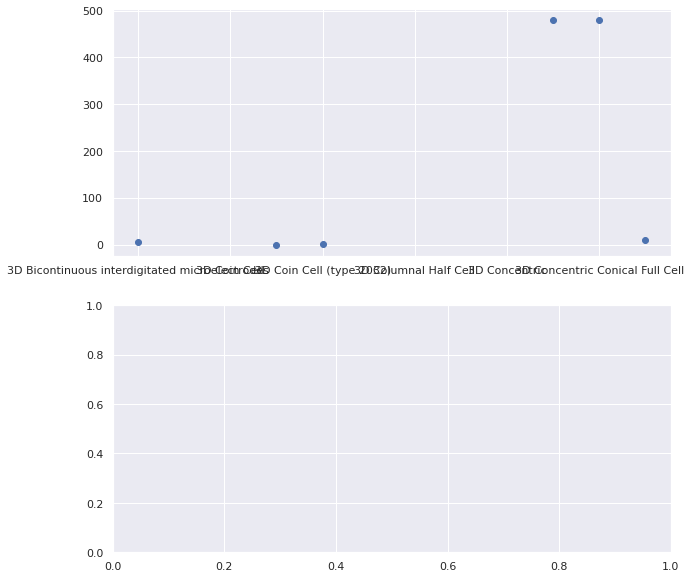

In [108]:
fig = plt.figure(figsize=(10,10))
axes = fig.subplots(nrows=2, ncols=1)

x = np.arange(0, len(unique_arc))
axes[0].set_xticklabels(unique_arc)
axes[0].plot(x, avg_full_cell_thicknesses, 'bo')

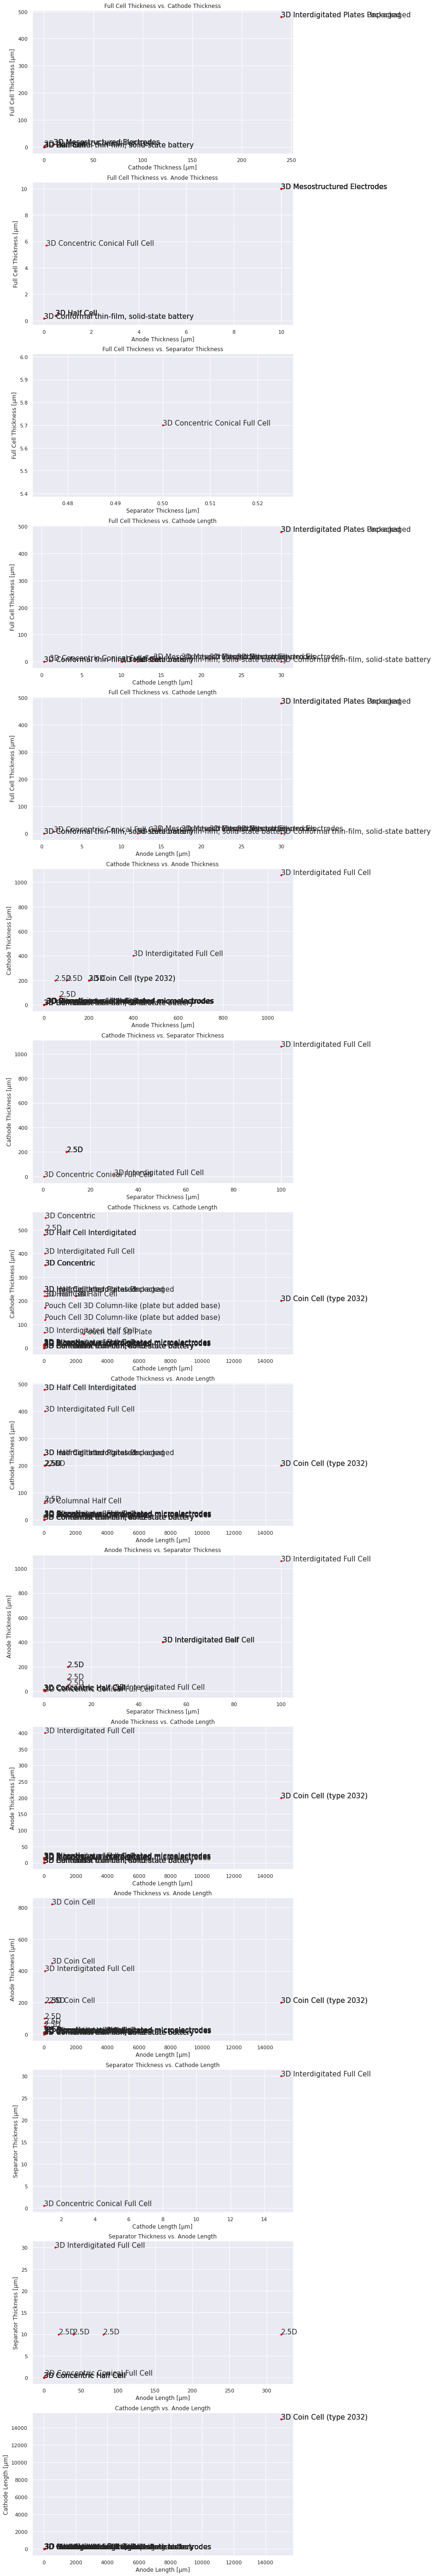

In [11]:
fig = plt.figure(figsize=(10,100))
axes = fig.subplots(nrows=15, ncols=1)
#plt.tight_layout()

axes[0].plot(cathode_thickness, full_cell_thickness, marker='.', linestyle='', color='red')
axes[0].set_title('Full Cell Thickness vs. Cathode Thickness')
axes[0].set_xlabel('Cathode Thickness [µm]')
axes[0].set_ylabel('Full Cell Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[0].annotate(text, (cathode_thickness[index], full_cell_thickness[index]), fontsize=15)
    
axes[1].plot(anode_thickness, full_cell_thickness, marker='.', linestyle='', color='red')
axes[1].set_title('Full Cell Thickness vs. Anode Thickness')
axes[1].set_xlabel('Anode Thickness [µm]')
axes[1].set_ylabel('Full Cell Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[1].annotate(text, (anode_thickness[index], full_cell_thickness[index]), fontsize=15)
    
axes[2].plot(sep_thickness, full_cell_thickness, marker='.', linestyle='', color='red')
axes[2].set_title('Full Cell Thickness vs. Separator Thickness')
axes[2].set_xlabel('Separator Thickness [µm]')
axes[2].set_ylabel('Full Cell Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[2].annotate(text, (sep_thickness[index], full_cell_thickness[index]), fontsize=15)
    
axes[3].plot(cathode_length, full_cell_thickness, marker='.', linestyle='', color='red')
axes[3].set_title('Full Cell Thickness vs. Cathode Length')
axes[3].set_xlabel('Cathode Length [µm]')
axes[3].set_ylabel('Full Cell Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[3].annotate(text, (cathode_length[index], full_cell_thickness[index]), fontsize=15)
    
axes[4].plot(anode_length, full_cell_thickness, marker='.', linestyle='', color='red')
axes[4].set_title('Full Cell Thickness vs. Cathode Length')
axes[4].set_xlabel('Anode Length [µm]')
axes[4].set_ylabel('Full Cell Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[4].annotate(text, (anode_length[index], full_cell_thickness[index]), fontsize=15)
    
axes[5].plot(anode_thickness, cathode_thickness, marker='.', linestyle='', color='red')
axes[5].set_title('Cathode Thickness vs. Anode Thickness')
axes[5].set_xlabel('Anode Thickness [µm]')
axes[5].set_ylabel('Cathode Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[5].annotate(text, (anode_thickness[index], cathode_thickness[index]), fontsize=15)
    
axes[6].plot(sep_thickness, cathode_thickness, marker='.', linestyle='', color='red')
axes[6].set_title('Cathode Thickness vs. Separator Thickness')
axes[6].set_xlabel('Separator Thickness [µm]')
axes[6].set_ylabel('Cathode Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[6].annotate(text, (sep_thickness[index], cathode_thickness[index]), fontsize=15)
    
axes[7].plot(cathode_length, cathode_thickness, marker='.', linestyle='', color='red')
axes[7].set_title('Cathode Thickness vs. Cathode Length')
axes[7].set_xlabel('Cathode Length [µm]')
axes[7].set_ylabel('Cathode Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[7].annotate(text, (cathode_length[index], cathode_thickness[index]), fontsize=15)
    
axes[8].plot(anode_length, cathode_thickness, marker='.', linestyle='', color='red')
axes[8].set_title('Cathode Thickness vs. Anode Length')
axes[8].set_xlabel('Anode Length [µm]')
axes[8].set_ylabel('Cathode Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[8].annotate(text, (anode_length[index], cathode_thickness[index]), fontsize=15)
    
axes[9].plot(sep_thickness, anode_thickness, marker='.', linestyle='', color='red')
axes[9].set_title('Anode Thickness vs. Separator Thickness')
axes[9].set_xlabel('Separator Thickness [µm]')
axes[9].set_ylabel('Anode Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[9].annotate(text, (sep_thickness[index], anode_thickness[index]), fontsize=15)
    
axes[10].plot(cathode_length, anode_thickness, marker='.', linestyle='', color='red')
axes[10].set_title('Anode Thickness vs. Cathode Length')
axes[10].set_xlabel('Cathode Length [µm]')
axes[10].set_ylabel('Anode Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[10].annotate(text, (cathode_length[index], anode_thickness[index]), fontsize=15)
    
axes[11].plot(anode_length, anode_thickness, marker='.', linestyle='', color='red')
axes[11].set_title('Anode Thickness vs. Anode Length')
axes[11].set_xlabel('Anode Length [µm]')
axes[11].set_ylabel('Anode Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[11].annotate(text, (anode_length[index], anode_thickness[index]), fontsize=15)
    
axes[12].plot(cathode_length, sep_thickness, marker='.', linestyle='', color='red')
axes[12].set_title('Separator Thickness vs. Cathode Length')
axes[12].set_xlabel('Cathode Length [µm]')
axes[12].set_ylabel('Separator Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[12].annotate(text, (cathode_length[index], sep_thickness[index]), fontsize=15)
    
axes[13].plot(anode_length, sep_thickness, marker='.', linestyle='', color='red')
axes[13].set_title('Separator Thickness vs. Anode Length')
axes[13].set_xlabel('Anode Length [µm]')
axes[13].set_ylabel('Separator Thickness [µm]')
for index, text in enumerate(overall_arc):
    axes[13].annotate(text, (anode_length[index], sep_thickness[index]), fontsize=15)
    
axes[14].plot(anode_length, cathode_length, marker='.', linestyle='', color='red')
axes[14].set_title('Cathode Length vs. Anode Length')
axes[14].set_xlabel('Anode Length [µm]')
axes[14].set_ylabel('Cathode Length [µm]')
for index, text in enumerate(overall_arc):
    axes[14].annotate(text, (anode_length[index], cathode_length[index]), fontsize=15)
    

#full_cell_thickness
#cathode_thickness
#anode_thickness
#sep_thickness
#cathode_length
#anode_length

In [146]:
mat_df = pd.read_excel('3D_Battery_Parameter_Log.xls', sheet_name='MaterialParameters')
mat_df.rename(columns={'Paper #': 'Paper'}, inplace=True)
mat_df.drop(columns=['DOI', 'Person'], inplace=True)

In [147]:
mat_df.head()

,Paper,Set,Cathode Material,Anode Material,Electrolyte Material,Cathode \nParticle Max. \nDiameter [µm],Cathode \nParticle Ave.\nDiameter [µm],Cathode \nParticle Min. \nDiameter [µm],Anode \nParticle Max. \nDiameter [µm],Anode \nParticle Ave. \nDiameter [µm],Anode \nParticle Min. \nDiameter [µm],Cathode \nElectric \nConductivity [S/cm],Anode \nElectric \nConductivity [S/cm],Electrolyte \nElectric \nConductivity [S/cm],Cathode \nDiffusivity \n[cm^2/s],Anode \nDiffusivity \n[cm^2/s],Electrolyte \nDiffusivity \n[cm^2/s]
0,1,1,LiFePO4,Lithium,Ionogel,N/R,NaN,NaN,N/R,NaN,NaN,0.05,N/R,0.002,N/R,N/R,N/R
1,2,1,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
2,2,2,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
3,2,3,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
4,2,4,Lithium foil,Silver,1M LiPF6 in EC:PC:EMC 1:1:3,N/R,N/R,N/R,0.03,N/R,0.05,N/R,N/R,N/R,N/R,N/R,N/R
